# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='../../data/'

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
train_ratings = pd.read_csv(path+'train_ratings.csv')
test_ratings = pd.read_csv(path+'test_ratings.csv')

print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('train_ratings shape: ', train_ratings.shape)
print('test_ratings shape: ', test_ratings.shape)

users shape:  (68092, 3)
books shape:  (149570, 10)
train_ratings shape:  (306795, 3)
test_ratings shape:  (76699, 3)


# users

## users 데이터 확인 [선택 실행]

In [3]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [5]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,68092.0,139381.329539,80523.969862,8.0,69008.75,138845.5,209388.25,278854.0
age,40259.0,36.069873,13.842571,5.0,25.00,34.0,45.00,99.0


In [6]:
users['user_id'].nunique()

68092

In [7]:
users.isna().sum()/len(users)

user_id     0.000000
location    0.000000
age         0.408756
dtype: float64

age에서 결측값 비율이 높은 걸 확인 가능합니다.

## location 분해

In [3]:
# 특수문자 제거
import re
users['location'] = [re.sub(r'[^0-9a-zA-Z:,]', '', l) for l in users['location'].values]

In [4]:
users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

In [5]:
users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada


In [6]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       3254
location_country     2124
dtype: int64

In [7]:
users[users['location_country'].isna()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
6,116866,"ottawa,,",NaN,ottawa,NaN,NaN
32,115097,"seattle,,",27.0,seattle,NaN,NaN
49,245827,"albuquerque,,",NaN,albuquerque,NaN,NaN
72,226745,"humble,,",38.0,humble,NaN,NaN
...,...,...,...,...,...,...
67797,257311,"lisbon,maine,",36.0,lisbon,maine,NaN
67929,267240,"houston,,",NaN,houston,NaN,NaN
67930,267276,"sammamish,,",NaN,sammamish,NaN,NaN
68058,276221,"calgary,,",NaN,calgary,NaN,NaN


country가 결측값인 일부 행을 살펴보면 city값이 존재하는데, country 정보가 없는 경우가 있습니다.

따라서 이런 경우를 처리해주도록 하겠습니다.

가장 많이 count된 location 조합으로 채워줍니다.

In [8]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [9]:
for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1].strip()
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2].strip()

In [10]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

location_state와 location_country의 결측값이 줄어든 것을 확인할 수 있습니다.

In [11]:
users.to_csv(path + 'users1.csv', index=False)

**city**

In [16]:
users['location_city'].value_counts()

location_city
london                        701
toronto                       656
portland                      629
seattle                       572
vancouver                     542
                             ... 
algarve:fontedobispotavira      1
garrett                         1
bainbridgeisl                   1
mayville                        1
grasse                          1
Name: count, Length: 11994, dtype: int64

In [17]:
(users['location_city'].value_counts()==1).index

Index(['london', 'toronto', 'portland', 'seattle', 'vancouver', 'chicago',
       'sanfrancisco', 'sandiego', 'newyork', 'ottawa',
       ...
       'southauckland', 'ndighton', 'metamora', 'elcaminovillage', 'jones',
       'algarve:fontedobispotavira', 'garrett', 'bainbridgeisl', 'mayville',
       'grasse'],
      dtype='object', name='location_city', length=11994)

**state**

In [18]:
users['location_state'].value_counts()

location_state
california     6878
texas          2507
ontario        2506
newyork        2400
england        2237
               ... 
gifu              1
agbs              1
gwent             1
grancanaria       1
ccp               1
Name: count, Length: 1323, dtype: int64

In [19]:
(users['location_state'].value_counts()==1).index

Index(['california', 'texas', 'ontario', 'newyork', 'england', 'florida',
       'washington', 'pennsylvania', 'britishcolumbia', 'illinois',
       ...
       'vaslui', 'northlincolnshire', 'cuenca', 'sk', 'maritimealps', 'gifu',
       'agbs', 'gwent', 'grancanaria', 'ccp'],
      dtype='object', name='location_state', length=1323)

- location_city와 location_state는 너무 많아서 하나하나 확인하기 힘듦
- city, state 둘 다 count가 하나인 값들이 꽤 많음 => 기타로 묶는 게 좋을까?

**country**

In [20]:
users['location_country'].unique() # 추가 확인

array(['canada', nan, 'usa', 'malaysia', 'newzealand', 'finland',
       'unitedkingdom', 'portugal', 'brazil', 'germany', 'austria',
       'australia', 'italy', 'france', 'netherlands', 'poland', 'us',
       'idaho', 'iran', 'aruba', 'spain', 'taiwan', 'singapore',
       'argentina', 'india', 'romania', 'england', 'belgium',
       'philippines', 'mexico', 'caymanislands', 'southafrica',
       'switzerland', 'yugoslavia', 'turkey', 'japan', 'china', 'ireland',
       'qatar', 'sweden', 'kuwait', 'indonesia', 'nepal',
       'cambridgeshire', 'unitedstates', 'northcarolina', 'slovakia',
       'norway', 'dominicanrepublic', 'southkorea', 'macedonia', 'kenya',
       'mauritius', 'virginia', 'madagascar', 'israel', 'egypt',
       'denmark', 'guatemala', 'russia', 'okinawa', 'palau',
       'czechrepublic', 'ca', 'newyork', 'venezuela', 'faraway',
       'antarctica', 'costarica', 'andorra', 'bulgaria', 'nigeria', 'dc',
       'everywhereandanywhere', 'slovenia', 'chile', 'catalunya

이름이 통일되어 있지 않다
- 약어 => ex. us, uk
- 공식 이름이 아닌 표기 => newmexico
- 나라 이름이 아닌 요상한 이름들 => iceland, everywhereandanywhere
- 나라 이름이 아니라 도시 이름이 들어가 있음 => seoul ...

=> 추가 전처리 시도 해보기

## KNNImputer로 결측치 처리

In [58]:
users = pd.read_csv(path + 'users1.csv')

### location columns Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

cat_col = ['location_city', 'location_state', 'location_country']
le_dict = {col:LabelEncoder() for col in cat_col} # column별 LabelEncoder 생성

for col, le in le_dict.items():
    users.loc[users[users[col].notna()].index, col] = le.fit_transform(users[users[col].notna()][col])

In [61]:
users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,10627,854,46
1,11400,"ottawa,ontario,canada",49.0,7911,854,46
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,10685,854,46
4,85526,"victoria,britishcolumbia,canada",36.0,11060,168,46


In [62]:
from sklearn.impute import KNNImputer

impute_df = users[['age', 'location_city', 'location_state', 'location_country']]
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(impute_df)
df_imputed = pd.DataFrame(imputed, columns=impute_df.columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               68092 non-null  float64
 1   location_city     68092 non-null  float64
 2   location_state    68092 non-null  float64
 3   location_country  68092 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


In [63]:
df_imputed.head()

,age,location_city,location_state,location_country
0,24.400000,10627.000000,854.000000,46.000000
1,49.000000,7911.000000,854.000000,46.000000
2,36.069873,6042.817361,647.916603,203.358193
3,30.000000,10685.000000,854.000000,46.000000
4,36.000000,11060.000000,168.000000,46.000000


In [64]:
df_imputed = df_imputed.astype(int)

In [65]:
df_imputed

,age,location_city,location_state,location_country
0,24,10627,854,46
1,49,7911,854,46
2,36,6042,647,203
3,30,10685,854,46
4,36,11060,168,46
...,...,...,...,...
68087,54,2609,192,249
68088,74,11060,310,46
68089,32,4981,22,249
68090,33,10975,168,46


In [66]:
df_imputed.isna().sum()

age                 0
location_city       0
location_state      0
location_country    0
dtype: int64

In [67]:
users[['age', 'location_city', 'location_state', 'location_country']] = df_imputed
users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",24,10627,854,46
1,11400,"ottawa,ontario,canada",49,7911,854,46
2,11676,"na,na,na",36,6042,647,203
3,67544,"toronto,ontario,canada",30,10685,854,46
4,85526,"victoria,britishcolumbia,canada",36,11060,168,46


In [68]:
users.isna().sum()

user_id             0
location            0
age                 0
location_city       0
location_state      0
location_country    0
dtype: int64

In [69]:
# label 원래대로 복원
for col, le in le_dict.items():
    print(le.classes_)
    users[col] = le.inverse_transform(df_imputed[col])

['0000largo' '03770elverger' '05680' ... 'zwickau' 'zwijndrecht'
 'zwingenberg']
['322dzkie' 'aargau' 'aarhus' ... 'zug' 'zuidholland' 'zurich']
['aberdeenshire' 'afghanistan' 'alabama' 'alachua' 'albania' 'alberta'
 'alderney' 'algeria' 'almera' 'andalucia' 'andorra' 'angola' 'antarctica'
 'antiguaandbarbuda' 'anystate' 'argentina' 'arizona' 'arkansas'
 'aroostook' 'aruba' 'auckland' 'austin' 'australia' 'austria' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belgium' 'belize' 'benin' 'bergued'
 'bermuda' 'bolivia' 'brazil' 'britishcolumbia' 'brunei' 'bulgaria'
 'burma' 'c' 'ca' 'california' 'cambodia' 'cambridgeshire' 'camden'
 'cameroon' 'canada' 'canaryislands' 'capeverde' 'caribbeansea'
 'catalunya' 'catalunyaspain' 'caymanislands' 'chile' 'china' 'cocarlow'
 'colombia' 'colorado' 'connecticut' 'costarica' 'countycork' 'croatia'
 'cuba' 'cyprus' 'czechrepublic' 'dc' 'denmark' 'deutschland'
 'disritofederal' 'districtofcolumbia' 'dominicanrepublic' 'ecuador'
 'egypt' 'england' 'esp

In [70]:
users

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",24,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49,ottawa,ontario,canada
2,11676,"na,na,na",36,logansport,macedonia,russia
3,67544,"toronto,ontario,canada",30,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36,victoria,britishcolumbia,canada
...,...,...,...,...,...,...
68087,278376,"danville,pennsylvania,usa",54,danville,california,usa
68088,278621,"victoria,delaware,canada",74,victoria,delaware,canada
68089,278636,"irvington,alabama,usa",32,irvington,alabama,usa
68090,278659,"vancouver,washington,usa",33,vancouver,britishcolumbia,canada


In [81]:
users = users.drop(columns='location')

In [85]:
users.isna().sum()

user_id             0
age                 0
location_city       0
location_state      0
location_country    0
dtype: int64

In [82]:
users.head()

,user_id,age,location_city,location_state,location_country
0,8,24,timmins,ontario,canada
1,11400,49,ottawa,ontario,canada
2,11676,36,logansport,macedonia,russia
3,67544,30,toronto,ontario,canada
4,85526,36,victoria,britishcolumbia,canada


In [83]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           68092 non-null  int64 
 1   age               68092 non-null  int64 
 2   location_city     68092 non-null  object
 3   location_state    68092 non-null  object
 4   location_country  68092 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.6+ MB


In [84]:
users.to_csv(path + 'v2/users.csv', index=False)

## 시각화 [선택 실행]
데이터 시각화를 통해 사용자들의 나이 분포, 거주 국가 등을 알아보겠습니다.

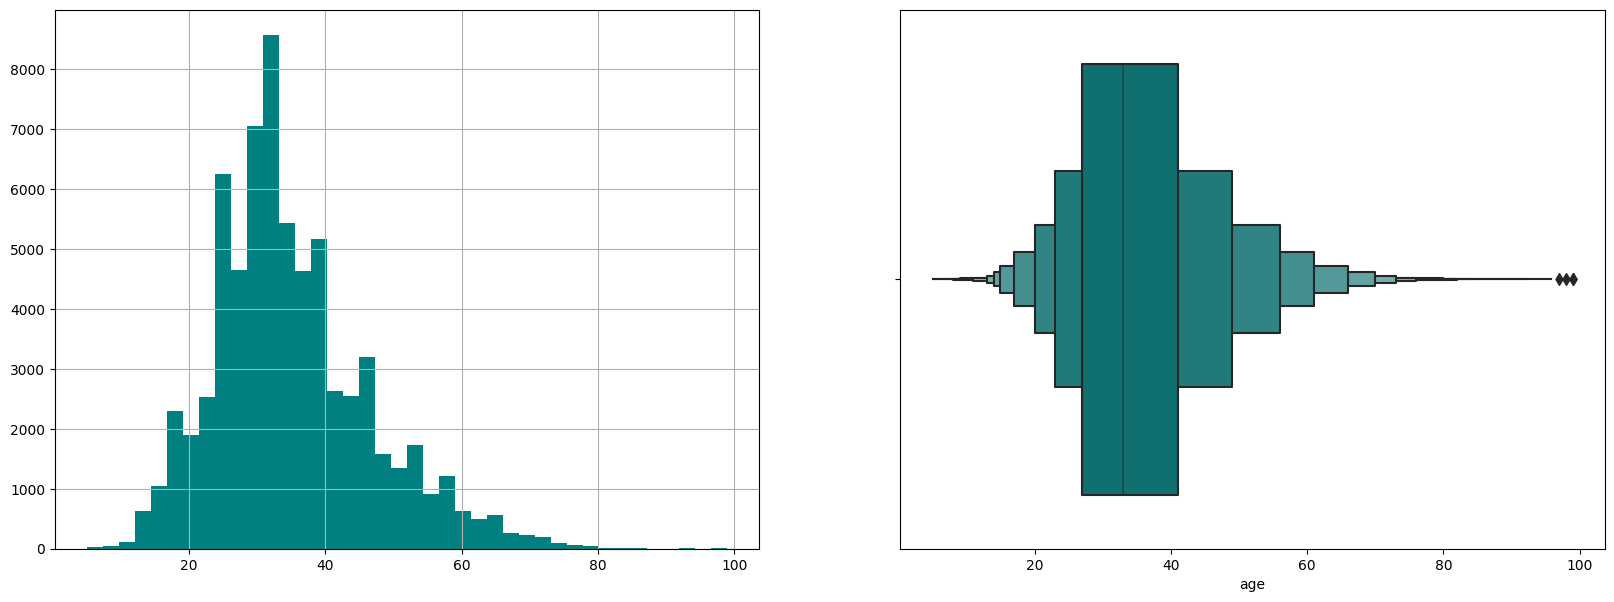

In [74]:
# 나이 분포
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

users['age'].hist(bins=40, color='teal', ax=ax[0])
sns.boxenplot(data=users, x='age', color='teal',ax=ax[1])

plt.show()

In [75]:
users['age'].value_counts()

age
30    4016
33    3077
29    3037
31    2925
35    2848
      ... 
86       1
94       1
89       1
98       1
92       1
Name: count, Length: 91, dtype: int64

In [76]:
users['age'].nunique()

91

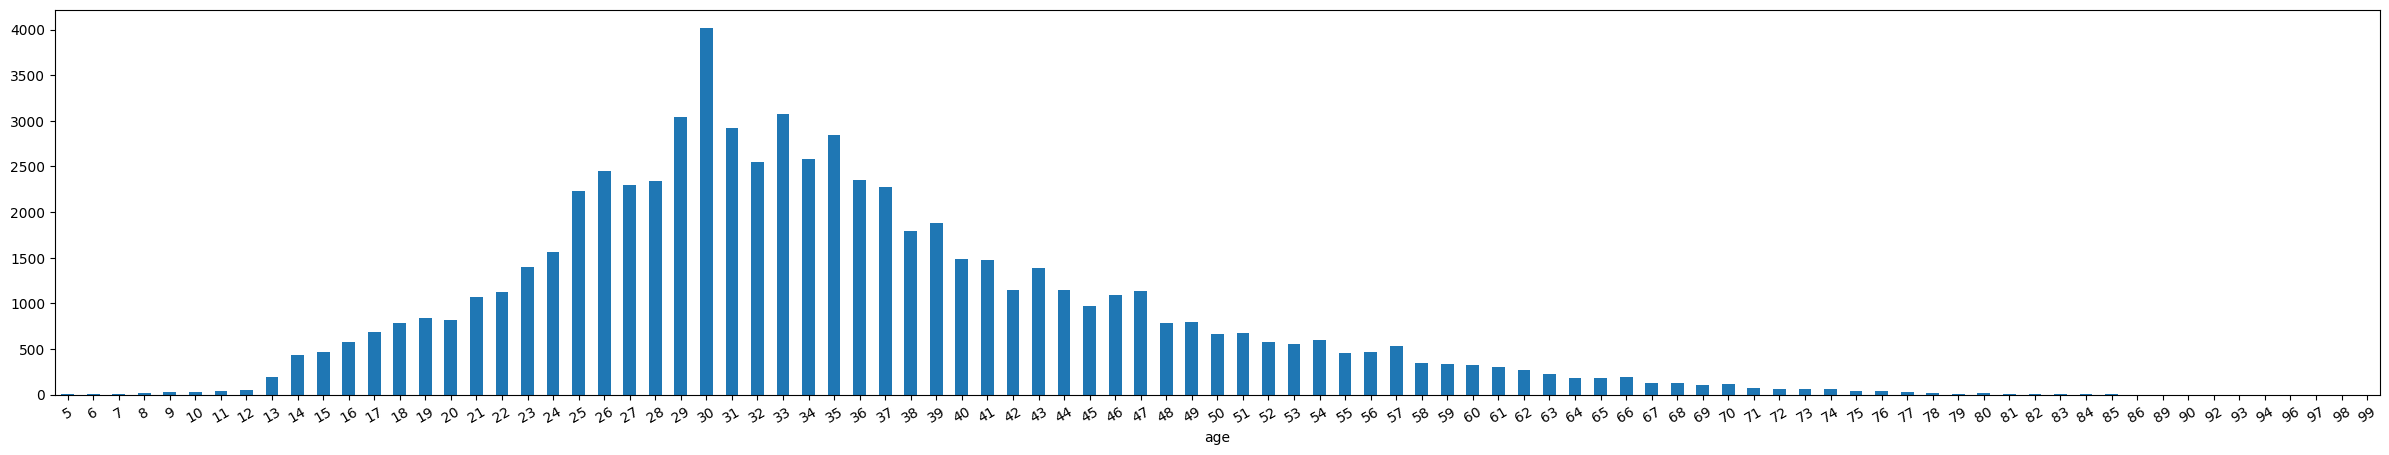

In [77]:
plt.figure(figsize=(30,5))
users['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

20대 중반 ~ 30대 중반까지의 사용자가 많은 것을 확인할 수 있습니다.

이번에는 사용자들의 거주 국가를 살펴보고 국가별로 사용자의 분포가 다른지 알아보겠습니다.

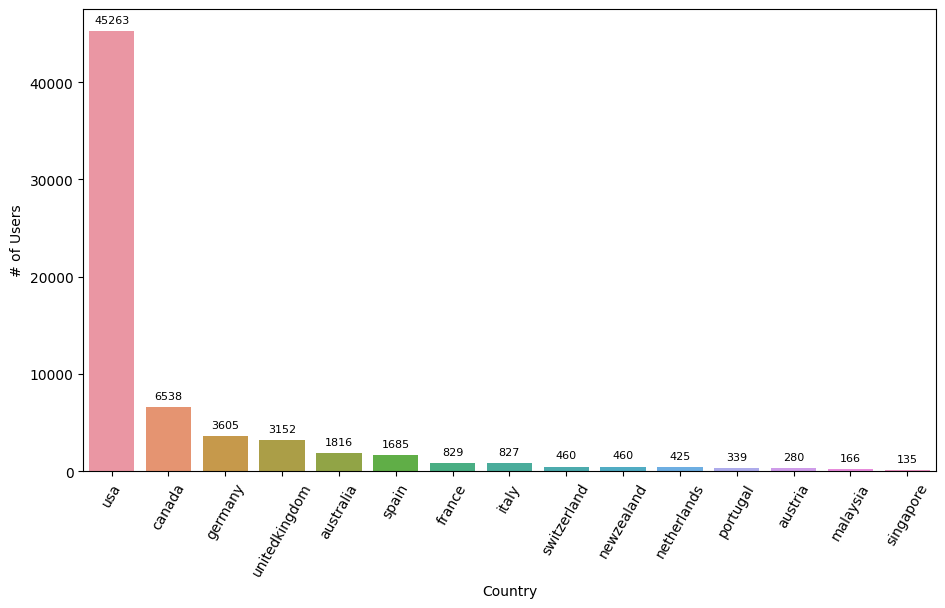

In [78]:
my_dict=(users['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

사용자의 대다수는 미국에 거주중인 것을 확인할 수 있습니다.

국가별 사용자의 나이대를 알아보겠습니다.



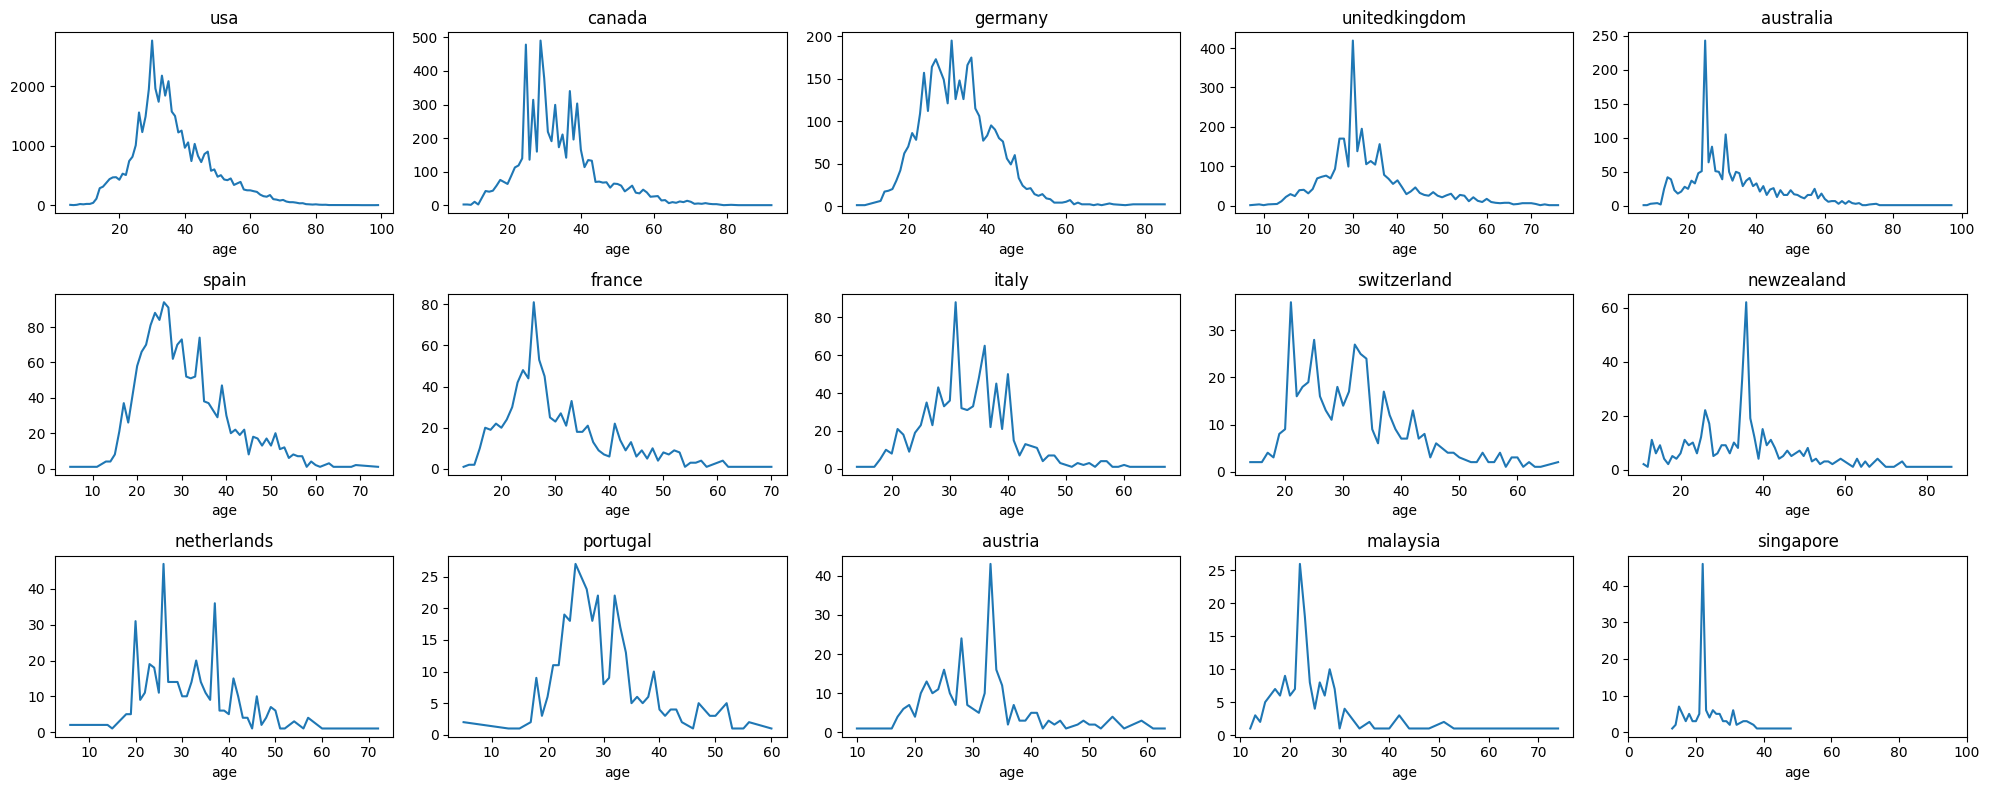

In [79]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['location_country'], ax.flatten()):
    users[(users['location_country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

대부분 20~30대 사용자가 많지만, 국가별로 사용자의 분포가 약간씩 차이가 있는 것을 확인할 수 있습니다.